# K-nearest neighbors (KNN)

In this notebook, we will look at an example of classification using K-nearest neighbors. As an example, we will a diabetes dataset that can be used to classify whether people have diabetes, based on some various health measurements.

Let us first load the usual modules and the dataset (which is available on Moodle).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [4]:
diab_data = pd.read_csv('../Notebooks and data-7/diabetes.csv')

In [5]:
diab_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diab_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Let is first make sure that the Outcome column that represent diabetes, actually only have 0's and 1's.

In [8]:
diab_data["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

We see that in the dataset, 500 persons do not have diabetes, while 268 do. We will use this as our response variable

In [9]:
y = diab_data["Outcome"]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

For the X variables, we take everything except "outcome", of course, and "Age".

In [10]:
X = diab_data.drop(columns = ["Age", "Outcome"])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,6,148,72,35,0,33.6,0.627
1,1,85,66,29,0,26.6,0.351
2,8,183,64,0,0,23.3,0.672
3,1,89,66,23,94,28.1,0.167
4,0,137,40,35,168,43.1,2.288


We now do a train-test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)          

We can now train a KNN classifier on our training data. We decide to set K equal to 5. (Note that not much is really happening when training a KNN model - the heavy stuff does not happen until we want to predict the class of a new point) First, we have to define the model.

In [12]:
knn5 = KNeighborsClassifier(n_neighbors=5)

Then we can train it:

In [13]:
knn5.fit(X_train, y_train)

KNeighborsClassifier()

And use it to make predictions on the training set and test set:

In [14]:
y_pred_train = knn5.predict(X_train)
y_pred_test = knn5.predict(X_test)

And then calculate the accuracy of our model on both training and test sets:

In [15]:
accuracy_score(y_train, y_pred_train)

0.8038194444444444

In [16]:
accuracy_score(y_test, y_pred_test)

0.6822916666666666

It looks like we overfitted somewhat with K=5! So let us try with K=10:

In [17]:
knn10 = KNeighborsClassifier(n_neighbors=10)

knn10.fit(X_train, y_train)

y_pred10_train = knn10.predict(X_train)
y_pred10_test = knn10.predict(X_test)

print("Training accuracy: {}\r\n".format(accuracy_score(y_train, y_pred10_train)))
print("Test accuracy: {}\r\n".format(accuracy_score(y_test, y_pred10_test)))

Training accuracy: 0.7847222222222222

Test accuracy: 0.7395833333333334



Even though we got a worse fit to training data, we get a higher accuracy on the test set, so clearly better.

Let us make a function that can try out different Ks and record training and test accuracy:

In [18]:
def knnSweep(X, y, maxK):
    # We create a 2-D array to store all accuracy values
    accuracy_row_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
        
    for k in range(2, maxK):
        # Model intializing
        knn = KNeighborsClassifier(n_neighbors=k)

        # Training (very light compared to an eager learner)
        knn.fit(X_train, y_train)

        # Predicting on train and test set
        y_pred_train = knn.predict(X_train)
        y_pred_test = knn.predict(X_test)

        #print("KNN with k={}:".format(k))
            
        # Get the accuracy from metrics
        accuracy_train = accuracy_score(y_train, y_pred_train)
        #print("Training accuracy: {}".format(accuracy_train))
        accuracy_test = accuracy_score(y_test, y_pred_test)
        #print("Test accuracy: {}\r\n".format(accuracy_test))

        accuracy_row_list.append({"k": k, "Training accuracy": accuracy_train, "Test accuracy": accuracy_test})

    return pd.DataFrame(accuracy_row_list)

In [19]:
acc_df = knnSweep(X, y, 25)
acc_df

,k,Training accuracy,Test accuracy
0,2,0.840278,0.713542
1,3,0.848958,0.635417
2,4,0.805556,0.708333
3,5,0.803819,0.682292
4,6,0.772569,0.666667
5,7,0.781250,0.677083
6,8,0.774306,0.718750
7,9,0.788194,0.723958
8,10,0.784722,0.739583
9,11,0.788194,0.708333


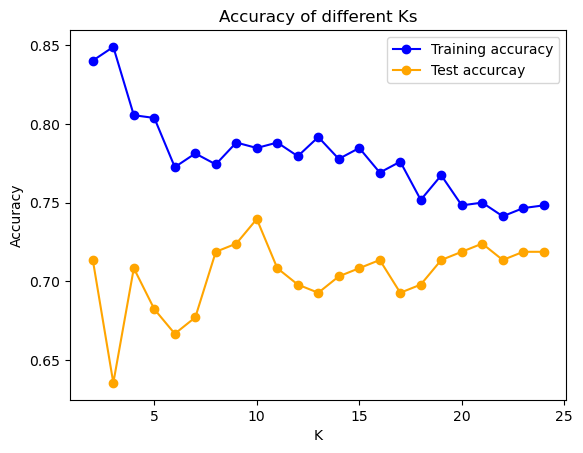

In [20]:
plt.plot(acc_df["k"], acc_df["Training accuracy"], label = 'Training accuracy', color='blue', marker='o', linestyle='solid')
plt.plot(acc_df["k"], acc_df["Test accuracy"], label = 'Test accurcay', color='orange', marker='o', linestyle='solid')
    
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Accuracy of different Ks")
plt.legend()

plt.show()

First note, that this is accuracy we have plotted and not error rate. Thus, we see that the best K is probably around 10.

## Data Scaling

We will now look at the effect of different scalings.

Let's take a 'statistical' view of all features:

In [21]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000


### StandardScaler

Let's scale the data using zero mean and unit variance scaling, i.e., StandardScaler:

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [23]:
X_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16,2.451743e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00


In [24]:
accuracies_standard_scaling = knnSweep(X_scaled, y, 25)

In [25]:
accuracies_standard_scaling

,k,Training accuracy,Test accuracy
0,2,0.840278,0.645833
1,3,0.873264,0.677083
2,4,0.810764,0.713542
3,5,0.826389,0.718750
4,6,0.815972,0.713542
5,7,0.826389,0.708333
6,8,0.795139,0.713542
7,9,0.817708,0.723958
8,10,0.803819,0.729167
9,11,0.803819,0.723958


It seems that KNN classifiers after data scaling achieve somewhat higher accuracy than the counterparts without scaling.

### MinMaxScaler

Let's try 0-1 scaling (MinMaxScaler) and see the effect.

In [26]:
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler()
X_scaled_mm = pd.DataFrame(minMaxScaler.fit_transform(X), columns=X.columns)

In [27]:
X_scaled_mm.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
accuracies_minmax_scaling = knnSweep(X_scaled_mm, y, 25)

In [29]:
accuracies_minmax_scaling

,k,Training accuracy,Test accuracy
0,2,0.852431,0.682292
1,3,0.848958,0.682292
2,4,0.812500,0.697917
3,5,0.814236,0.708333
4,6,0.807292,0.708333
5,7,0.814236,0.692708
6,8,0.802083,0.697917
7,9,0.809028,0.692708
8,10,0.802083,0.692708
9,11,0.802083,0.697917


Again, it seems that KNN classifiers after data scaling achieve somewhat higher accuracy than the counterparts without scaling.

Let us now visualize the effect of scaling:

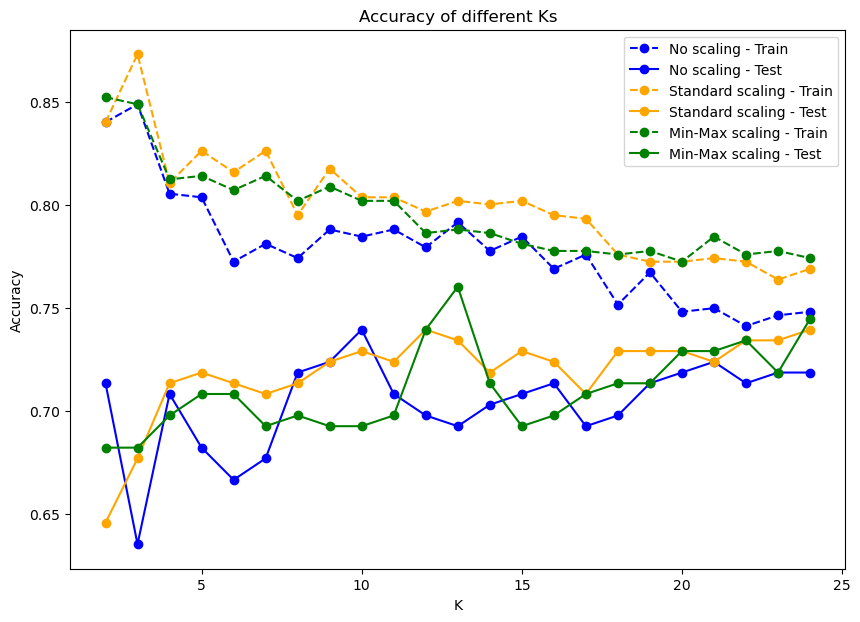

In [30]:
plt.rc("figure", figsize=(10, 7))

plt.plot(acc_df["k"], acc_df["Training accuracy"], label = 'No scaling - Train', color='blue', marker='o', linestyle='dashed')
plt.plot(acc_df["k"], acc_df["Test accuracy"], label = 'No scaling - Test', color='blue', marker='o', linestyle='solid')

plt.plot(accuracies_standard_scaling["k"], accuracies_standard_scaling["Training accuracy"],
         label = 'Standard scaling - Train', color='orange', marker='o', linestyle='dashed')
plt.plot(accuracies_standard_scaling["k"], accuracies_standard_scaling["Test accuracy"],
         label = 'Standard scaling - Test', color='orange', marker='o', linestyle='solid')

plt.plot(accuracies_minmax_scaling["k"], accuracies_minmax_scaling["Training accuracy"],
         label = 'Min-Max scaling - Train', color='green', marker='o', linestyle='dashed')
plt.plot(accuracies_minmax_scaling["k"], accuracies_minmax_scaling["Test accuracy"],
         label = 'Min-Max scaling - Test', color='green', marker='o', linestyle='solid')
    
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("Accuracy of different Ks")
plt.legend()

plt.show()

In this example, the scaling is not definitive much better, but there is clearly some improvements due to scaling, still.